In [1]:
from treesampling.algorithms import castaway_rst, wilson_rst, kirchoff_rst, colbourn_rst
from treesampling.utils.graphs import random_weakly_connected_graph
import time
import seaborn as sns
import pandas as pd

In [7]:
res = []
n_samples = 50
# nodes
for n in range(4, 30, 7):
    # sampling
    for rst in [wilson_rst, kirchoff_rst, colbourn_rst, castaway_rst]:
    # for rst in [wilson_rst, kirchoff_rst, colbourn_rst]:
        # connection weakness
        for w in [1e-2, 5e-3, 1e-3, 5e-4, 1e-4, 5e-5]:
            print(f'n={n}, rst={rst.__name__}, w={w}')
            G = random_weakly_connected_graph(n, weak_weight=w)
            start_time = time.time()
            for _ in range(n_samples):
                T = rst(G, 0)
                
            avg_time = (time.time() - start_time) / n_samples
            res.append({'n': n, 'rst': rst.__name__, 'w': w, 'time': avg_time})


n=4, rst=wilson_rst, w=0.01
n=4, rst=wilson_rst, w=0.005
n=4, rst=wilson_rst, w=0.001
n=4, rst=wilson_rst, w=0.0005
n=4, rst=wilson_rst, w=0.0001
n=4, rst=wilson_rst, w=5e-05
n=4, rst=kirchoff_rst, w=0.01
n=4, rst=kirchoff_rst, w=0.005
n=4, rst=kirchoff_rst, w=0.001
n=4, rst=kirchoff_rst, w=0.0005
n=4, rst=kirchoff_rst, w=0.0001
n=4, rst=kirchoff_rst, w=5e-05
n=4, rst=colbourn_rst, w=0.01
n=4, rst=colbourn_rst, w=0.005
n=4, rst=colbourn_rst, w=0.001
n=4, rst=colbourn_rst, w=0.0005
n=4, rst=colbourn_rst, w=0.0001
n=4, rst=colbourn_rst, w=5e-05
n=4, rst=castaway_rst, w=0.01
n=4, rst=castaway_rst, w=0.005
n=4, rst=castaway_rst, w=0.001
n=4, rst=castaway_rst, w=0.0005
n=4, rst=castaway_rst, w=0.0001
n=4, rst=castaway_rst, w=5e-05
n=11, rst=wilson_rst, w=0.01
n=11, rst=wilson_rst, w=0.005
n=11, rst=wilson_rst, w=0.001
n=11, rst=wilson_rst, w=0.0005
n=11, rst=wilson_rst, w=0.0001
n=11, rst=wilson_rst, w=5e-05
n=11, rst=kirchoff_rst, w=0.01
n=11, rst=kirchoff_rst, w=0.005
n=11, rst=kirchoff_r

In [8]:
df = pd.DataFrame(res)

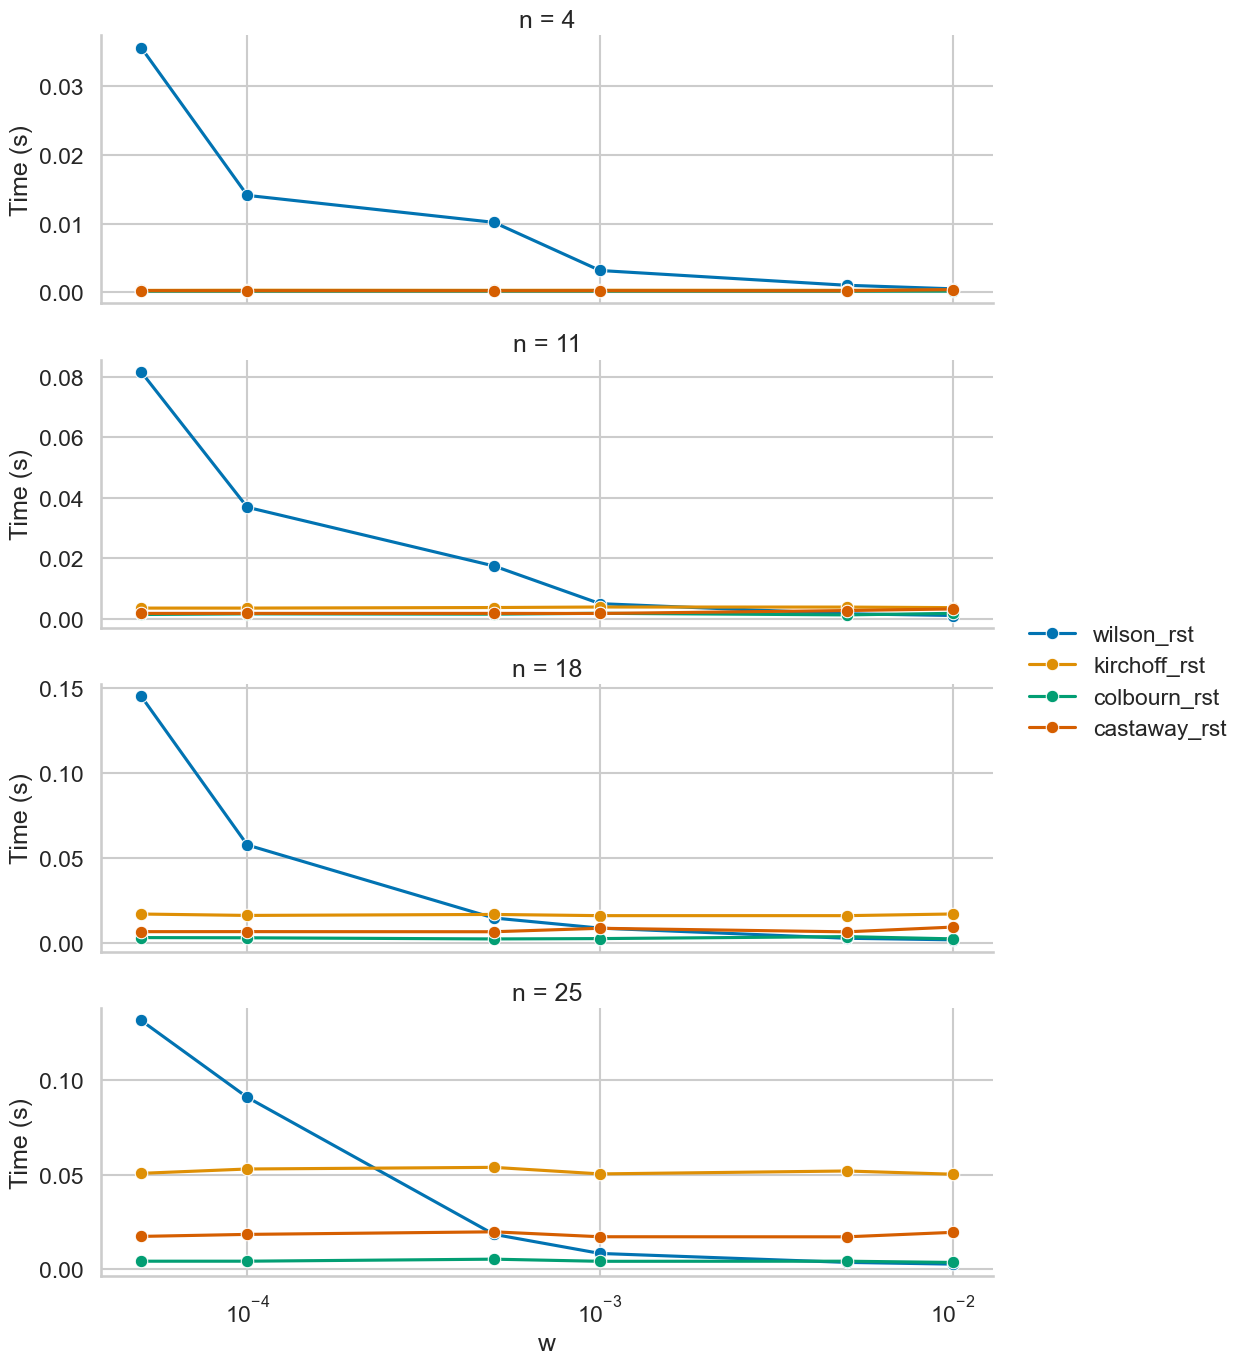

In [9]:
sns.set_theme()
sns.set_context("talk")
sns.set_style("whitegrid")
sns.set_palette("colorblind")
g = sns.FacetGrid(df, row='n', height=3.5, aspect=3, sharey=False)
g.map(sns.lineplot, 'w', 'time', hue='rst', marker='o', data=df)
g.add_legend()
g.set_axis_labels('w', 'Time (s)')
g.set(xscale='log')
g.set_titles('n = {row_name}')
g.tight_layout()
g
# g.savefig('weakly_connected_performance.pdf')